# Models Examples

First we must do some setup

In [1]:
import chimeric_tools.Simulation as ctc
import chimeric_tools.Data as ctd
import chimeric_tools.models as ctm
from datetime import date
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

import warnings
warnings.filterwarnings('ignore')

## Training Simulated Data

This is the only example you will need in this module. We are going to use simulated data and make a forecasts 1, 2, 3, and 4 weeks ahead for each week starting 15 weeks after the `start_date`.

In [2]:
bs = ctc.COVID(start_date="2020-01-01", end_date="2021-07-31", geo_values=["US", "42095"], include=["cases"]).simulate("auto", 5)
preds = ctm.train_simulated_data(bs, ["AR3", "AR6"], include="cases")

#### Plotting the data

Now it is time to plot the data to show what has actually happened under the hood

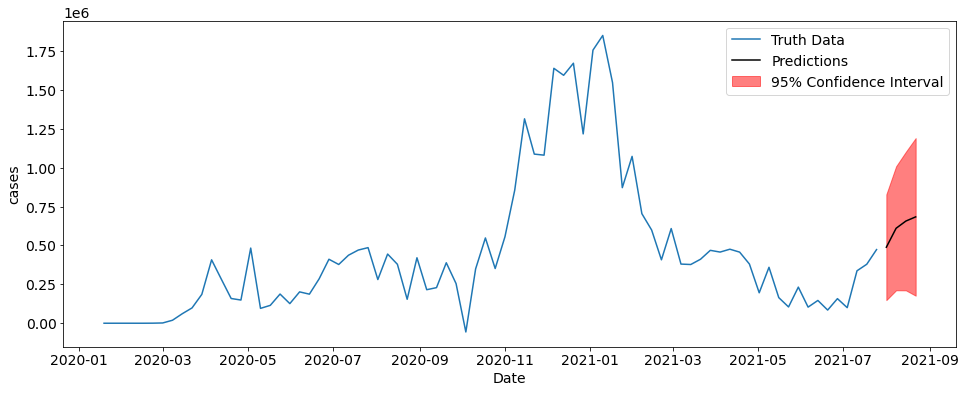

In [3]:
mask = (preds.sim == 0) & (preds.forecast_date == date(2021, 7, 25)) & (preds.model == "AR6")
sub_data = bs.loc[bs.sim == 0]
sub_preds = preds.loc[mask]
ctm.plot_single_predictions(sub_data, sub_preds, "cases")

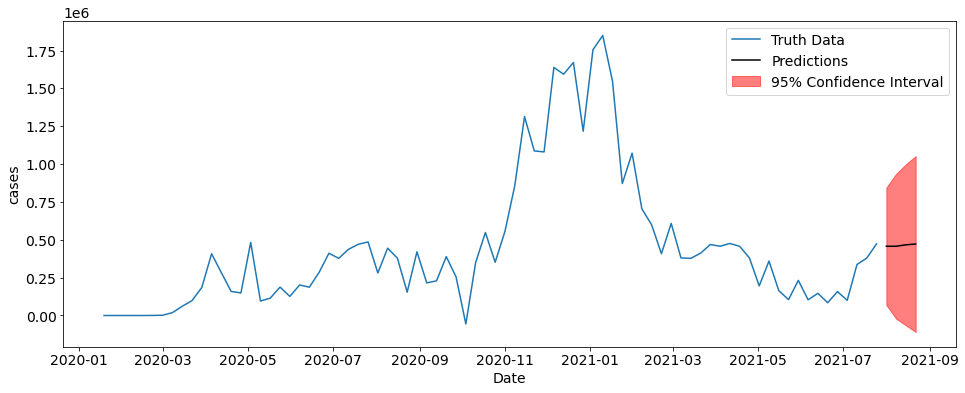

In [4]:
mask = (preds.sim == 0) & (preds.forecast_date == date(2021, 7, 25)) & (preds.model == "AR3")
sub_data = bs.loc[bs.sim == 0]
sub_preds = preds.loc[mask]
ctm.plot_single_predictions(sub_data, sub_preds, "cases")